In [138]:
#Download Libraries 
import os # Operating System
import numpy as np
import pandas as pd
import datetime as dt # Datetime
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes
#from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style
# install wordcloud
#!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
#from wordcloud import WordCloud, STOPWORDS

#!conda install -c conda-forge folium=0.5.0 --yes
#import folium #import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [139]:
filename ='https://cloud-object-storage-moviedata.s3.eu-de.cloud-object-storage.appdomain.cloud/movie_metadata.csv'
df_movie = pd.read_csv(filename, encoding='latin1')
print('Data loaded')

Data loaded


In [140]:
df_movie

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [141]:
df_movie.shape

(5043, 28)

In [142]:
# clean up the dataset to remove unnecessary columns  
df_movie.drop(['actor_3_facebook_likes', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'aspect_ratio', 'cast_total_facebook_likes', 'plot_keywords'], axis = 1, inplace = True)

In [143]:
print(df_movie.columns.values)

['color' 'director_name' 'num_critic_for_reviews' 'duration'
 'director_facebook_likes' 'actor_2_name' 'gross' 'genres' 'actor_1_name'
 'movie_title' 'num_voted_users' 'actor_3_name' 'facenumber_in_poster'
 'movie_imdb_link' 'num_user_for_reviews' 'language' 'country'
 'content_rating' 'budget' 'title_year' 'imdb_score'
 'movie_facebook_likes']


In [144]:
# for sake of consistency, let's also make all column labels of type string
df_movie.columns = list(map(str, df_movie.columns))

In [145]:
print ('data dimensions:', df_movie.shape)

data dimensions: (5043, 22)


In [146]:
df_movie

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_2_name,gross,genres,actor_1_name,movie_title,...,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,AvatarÂ,...,0.0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,7.9,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's EndÂ,...,0.0,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,7.1,0
2,Color,Sam Mendes,602.0,148.0,0.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,SpectreÂ,...,1.0,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,6.8,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight RisesÂ,...,0.0,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,8.5,164000
4,NaN,Doug Walker,NaN,NaN,131.0,Rob Walker,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force AwakensÂ ...,...,0.0,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,7.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,Daphne Zuniga,NaN,Comedy|Drama,Eric Mabius,Signed Sealed DeliveredÂ,...,2.0,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,NaN,2013.0,7.7,84
5039,Color,NaN,43.0,43.0,NaN,Valorie Curry,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The FollowingÂ,...,1.0,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN,NaN,7.5,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,Maxwell Moody,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So PleasantÂ,...,0.0,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,NaN,1400.0,2013.0,6.3,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,Daniel Henney,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai CallingÂ,...,5.0,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,NaN,2012.0,6.3,660


In [147]:
print(df_movie['movie_title'])

0                                                AvatarÂ 
1              Pirates of the Caribbean: At World's EndÂ 
2                                               SpectreÂ 
3                                 The Dark Knight RisesÂ 
4       Star Wars: Episode VII - The Force AwakensÂ   ...
                              ...                        
5038                            Signed Sealed DeliveredÂ 
5039                          The FollowingÂ             
5040                               A Plague So PleasantÂ 
5041                                   Shanghai CallingÂ 
5042                                  My Date with DrewÂ 
Name: movie_title, Length: 5043, dtype: object


In [148]:
df_movie.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_2_name', 'gross', 'genres',
       'actor_1_name', 'movie_title', 'num_voted_users', 'actor_3_name',
       'facenumber_in_poster', 'movie_imdb_link', 'num_user_for_reviews',
       'language', 'country', 'content_rating', 'budget', 'title_year',
       'imdb_score', 'movie_facebook_likes'],
      dtype='object')

In [149]:
df_movie.dtypes

color                       object
director_name               object
num_critic_for_reviews     float64
duration                   float64
director_facebook_likes    float64
actor_2_name                object
gross                      float64
genres                      object
actor_1_name                object
movie_title                 object
num_voted_users              int64
actor_3_name                object
facenumber_in_poster       float64
movie_imdb_link             object
num_user_for_reviews       float64
language                    object
country                     object
content_rating              object
budget                     float64
title_year                 float64
imdb_score                 float64
movie_facebook_likes         int64
dtype: object

In [150]:
df_movie['duration'].mean()

107.2010739856802

In [151]:
df_movie.sort_values('duration')

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_2_name,gross,genres,actor_1_name,movie_title,...,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes
2345,Color,Jane Clark,NaN,7.0,23.0,Traci Dinwiddie,NaN,Romance|Short,Necar Zadegan,The TouchÂ,...,0.0,http://www.imdb.com/title/tt1128219/?ref_=fn_t...,NaN,English,USA,NaN,13000.0,2007.0,5.2,30
1947,Color,NaN,12.0,7.0,NaN,John Sparkes,NaN,Animation|Comedy|Family,Justin Fletcher,Shaun the SheepÂ,...,0.0,http://www.imdb.com/title/tt0983983/?ref_=fn_t...,12.0,English,UK,TV-G,NaN,NaN,8.3,834
4079,Color,NaN,38.0,11.0,NaN,Seth Green,NaN,Animation|Comedy,Matthew Senreich,Robot ChickenÂ,...,0.0,http://www.imdb.com/title/tt0437745/?ref_=fn_t...,75.0,English,USA,TV-MA,NaN,NaN,7.8,1000
4673,Color,Clark Baker,1.0,14.0,0.0,Alan Pietruszewski,NaN,Horror|Sci-Fi|Short|Thriller,Taylor Pigeon,VesselÂ,...,1.0,http://www.imdb.com/title/tt2164708/?ref_=fn_t...,3.0,English,USA,NaN,NaN,2012.0,6.2,14
4439,Color,Robert Greenwald,56.0,20.0,21.0,Jon Hunter,NaN,Documentary,Lee Scott,Wal-Mart: The High Cost of Low PriceÂ,...,0.0,http://www.imdb.com/title/tt0473107/?ref_=fn_t...,70.0,English,USA,Not Rated,1500000.0,2005.0,6.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4517,Color,NaN,2.0,NaN,NaN,John Jarratt,NaN,Drama|Horror|Thriller,Richard Cawthorne,Wolf CreekÂ,...,0.0,http://www.imdb.com/title/tt4460878/?ref_=fn_t...,6.0,English,Australia,NaN,NaN,NaN,7.1,954
4609,Color,Wajahat Rauf,6.0,NaN,3.0,Ayesha Omar,NaN,Comedy|Family,Rasheed Naz,Karachi se LahoreÂ,...,9.0,http://www.imdb.com/title/tt4590482/?ref_=fn_t...,15.0,Urdu,Pakistan,NaN,1000000.0,2015.0,7.0,259
4690,Color,Joseph Kosinski,4.0,NaN,364.0,Lauren Cohan,NaN,Action|Adventure|Fantasy|Sci-Fi,Peter Dinklage,DestinyÂ,...,0.0,http://www.imdb.com/title/tt2983582/?ref_=fn_t...,11.0,English,USA,NaN,NaN,2014.0,8.1,1000
4948,Color,Valentine,NaN,NaN,0.0,Valentine,NaN,Romance,Diane Sorrentino,Romantic SchemerÂ,...,2.0,http://www.imdb.com/title/tt4607906/?ref_=fn_t...,NaN,English,USA,PG-13,125000.0,2015.0,5.1,0


In [152]:
df_movie.describe

<bound method NDFrame.describe of       color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4       NaN        Doug Walker                     NaN       NaN   
...     ...                ...                     ...       ...   
5038  Color        Scott Smith                     1.0      87.0   
5039  Color                NaN                    43.0      43.0   
5040  Color   Benjamin Roberds                    13.0      76.0   
5041  Color        Daniel Hsia                    14.0     100.0   
5042  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes      actor_2_name        gross  \
0                         0.0  Joel David Moore  760505847.0   
1                    

In [153]:
genres = df_movie['genres'].value_counts()[df_movie['genres'].value_counts() > 10].index
df_movie[df_movie['genres'].isin(genres)].groupby('genres')['imdb_score'].mean()

genres
Action                             5.972727
Action|Adventure                   6.700000
Action|Adventure|Comedy            6.075000
Action|Adventure|Drama|Thriller    6.284615
Action|Adventure|Fantasy           6.233333
                                     ...   
Horror|Sci-Fi|Thriller             5.427778
Horror|Thriller                    5.651786
Mystery|Thriller                   6.559091
Thriller                           5.350000
Western                            6.583333
Name: imdb_score, Length: 93, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1185b8e90>,
      dtype=object)

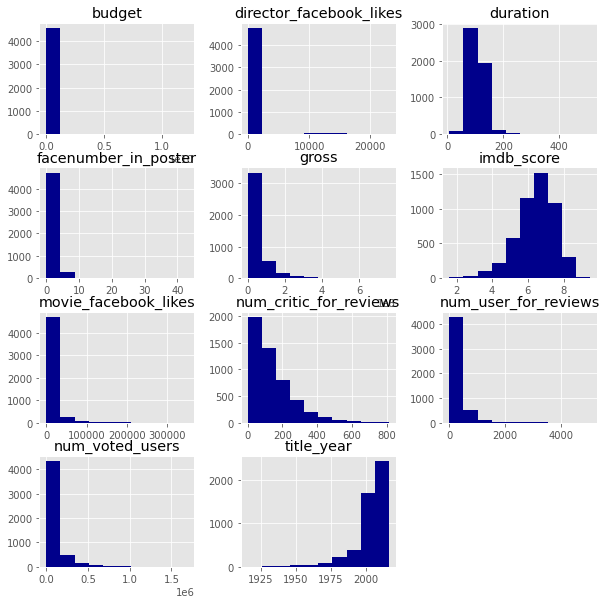

In [154]:
df_movie.hist(color='DarkBlue',figsize= (10,10))

Create a histogram of duration, choosing an “appropriate” number of bins

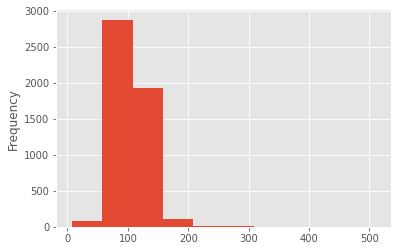

In [155]:
df_movie['duration'].plot(kind='hist', bins=10)

Use a box plot to display that same data

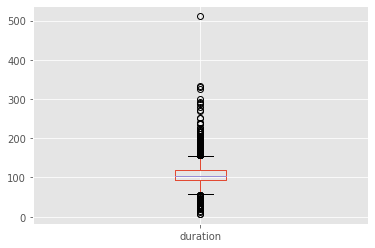

In [156]:
df_movie['duration'].plot(kind='box')

In [157]:
df_movie[['content_rating', 'movie_title']].groupby('content_rating').count()

,movie_title
content_rating,
Approved,55
G,112
GP,6
M,5
NC-17,7
Not Rated,116
PG,701
PG-13,1461
Passed,9


Use a visualization to display that same data, including a title and x and y labels

Text(0, 0.5, 'movie_title')

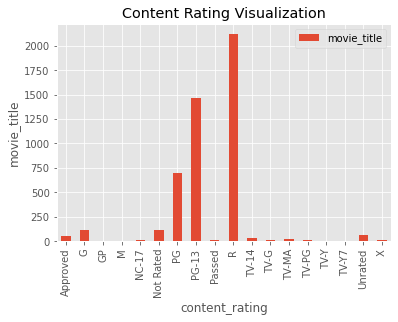

In [158]:
df_movie[['content_rating', 'movie_title']].groupby('content_rating').count().plot(kind='bar', title= 'Content Rating Visualization')
plt.xlabel('content_rating')
plt.ylabel('movie_title')  

Determine the top rated movie (by imdb score) for each genre

In [159]:
df_movie.sort_values('imdb_score', ascending=False).groupby('genres')['movie_title', 'imdb_score'].first()

,movie_title,imdb_score
genres,,
Action,Kickboxer: VengeanceÂ,9.1
Action|Adventure,Raiders of the Lost ArkÂ,8.5
Action|Adventure|Animation|Comedy|Crime|Family|Fantasy,Osmosis JonesÂ,6.2
Action|Adventure|Animation|Comedy|Drama|Family|Fantasy|Thriller,Alpha and Omega 4: The Legend of the Saw Tooth...,6.0
Action|Adventure|Animation|Comedy|Drama|Family|Sci-Fi,The Iron GiantÂ,8.0
...,...,...
Sci-Fi|Thriller,Blade RunnerÂ,8.2
Thriller,FrenzyÂ,7.5
Thriller|War,The TrainÂ,7.9


Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates

In [160]:
result = df_movie[df_movie['movie_title'].isin(df_movie[df_movie.duplicated(['movie_title'])]['movie_title'])]
result.sort_values('movie_title')

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_2_name,gross,genres,actor_1_name,movie_title,...,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes
3711,Color,Richard Fleischer,69.0,127.0,130.0,Robert J. Wilke,NaN,Adventure|Drama|Family|Fantasy|Sci-Fi,James Mason,"20,000 Leagues Under the SeaÂ",...,0.0,http://www.imdb.com/title/tt0046672/?ref_=fn_t...,108.0,English,USA,Approved,5000000.0,1954.0,7.2,0
4894,Color,Richard Fleischer,69.0,127.0,130.0,Robert J. Wilke,NaN,Adventure|Drama|Family|Fantasy|Sci-Fi,James Mason,"20,000 Leagues Under the SeaÂ",...,0.0,http://www.imdb.com/title/tt0046672/?ref_=fn_t...,108.0,English,USA,Approved,5000000.0,1954.0,7.2,0
4950,Color,David Hewlett,8.0,88.0,686.0,David Hewlett,NaN,Comedy,Christopher Judge,A Dog's BreakfastÂ,...,2.0,http://www.imdb.com/title/tt0796314/?ref_=fn_t...,46.0,English,Canada,NaN,120000.0,2007.0,7.0,377
4949,Color,David Hewlett,8.0,88.0,686.0,David Hewlett,NaN,Comedy,Christopher Judge,A Dog's BreakfastÂ,...,2.0,http://www.imdb.com/title/tt0796314/?ref_=fn_t...,46.0,English,Canada,NaN,120000.0,2007.0,7.0,377
1420,Color,Wes Craven,256.0,101.0,0.0,Lin Shaye,26505000.0,Horror,Johnny Depp,A Nightmare on Elm StreetÂ,...,1.0,http://www.imdb.com/title/tt0087800/?ref_=fn_t...,668.0,English,USA,X,1800000.0,1984.0,7.5,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,Color,Paul McGuigan,159.0,110.0,118.0,Spencer Wilding,5773519.0,Drama|Horror|Sci-Fi|Thriller,Daniel Radcliffe,Victor FrankensteinÂ,...,2.0,http://www.imdb.com/title/tt1976009/?ref_=fn_t...,91.0,English,USA,PG-13,40000000.0,2015.0,6.0,11000
1146,Color,Paul McGuigan,159.0,110.0,118.0,Spencer Wilding,5773519.0,Drama|Horror|Sci-Fi|Thriller,Daniel Radcliffe,Victor FrankensteinÂ,...,2.0,http://www.imdb.com/title/tt1976009/?ref_=fn_t...,91.0,English,USA,PG-13,40000000.0,2015.0,6.0,11000
2099,Color,Paul McGuigan,159.0,110.0,118.0,Spencer Wilding,5773519.0,Drama|Horror|Sci-Fi|Thriller,Daniel Radcliffe,Victor FrankensteinÂ,...,2.0,http://www.imdb.com/title/tt1976009/?ref_=fn_t...,91.0,English,USA,PG-13,40000000.0,2015.0,6.0,11000
2169,Color,Paul McGuigan,98.0,114.0,118.0,Christopher Cousins,12831121.0,Drama|Mystery|Romance|Thriller,Jessica ParÃ©,Wicker ParkÂ,...,0.0,http://www.imdb.com/title/tt0324554/?ref_=fn_t...,298.0,English,USA,PG-13,30000000.0,2004.0,7.0,0


Calculate the average star rating for each genre, but only include genres with at least 10 movies

In [161]:
df_movie[['genres', 'movie_title']].groupby('genres').count()

,movie_title
genres,
Action,11
Action|Adventure,11
Action|Adventure|Animation|Comedy|Crime|Family|Fantasy,1
Action|Adventure|Animation|Comedy|Drama|Family|Fantasy|Thriller,1
Action|Adventure|Animation|Comedy|Drama|Family|Sci-Fi,2
...,...
Sci-Fi|Thriller,10
Thriller,20
Thriller|War,1


In [162]:
df_movie.corr(method='pearson')

,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,facenumber_in_poster,num_user_for_reviews,budget,title_year,imdb_score,movie_facebook_likes
num_critic_for_reviews,1.000000,0.258486,0.180674,0.480601,0.624943,-0.033897,0.609387,0.119994,0.275707,0.305303,0.683176
duration,0.258486,1.000000,0.173296,0.250298,0.314765,0.013469,0.328403,0.074276,-0.135038,0.261662,0.196605
director_facebook_likes,0.180674,0.173296,1.000000,0.144945,0.297057,-0.041268,0.221890,0.021090,-0.063820,0.170802,0.162048
gross,0.480601,0.250298,0.144945,1.000000,0.637271,-0.027755,0.559958,0.102179,0.030886,0.198021,0.378082
num_voted_users,0.624943,0.314765,0.297057,0.637271,1.000000,-0.026998,0.798406,0.079621,0.007397,0.410965,0.537924
facenumber_in_poster,-0.033897,0.013469,-0.041268,-0.027755,-0.026998,1.000000,-0.069018,-0.019559,0.061504,-0.062958,0.008918
num_user_for_reviews,0.609387,0.328403,0.221890,0.559958,0.798406,-0.069018,1.000000,0.084292,-0.003147,0.292475,0.400594
budget,0.119994,0.074276,0.021090,0.102179,0.079621,-0.019559,0.084292,1.000000,0.045726,0.030688,0.062039
title_year,0.275707,-0.135038,-0.063820,0.030886,0.007397,0.061504,-0.003147,0.045726,1.000000,-0.209167,0.218678
imdb_score,0.305303,0.261662,0.170802,0.198021,0.410965,-0.062958,0.292475,0.030688,-0.209167,1.000000,0.247049


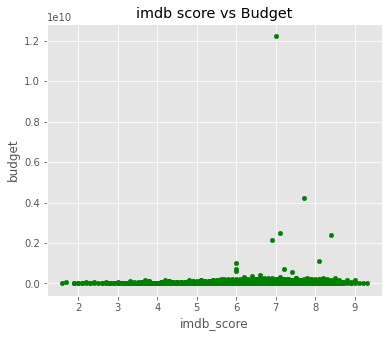

In [163]:
df_movie.plot.scatter(x='imdb_score', y='budget',title='imdb score vs Budget',color='Green',figsize=(6,5));

In [164]:
df_movie.sort_values('imdb_score', ascending=False).groupby('director_name')['movie_title', 'imdb_score'].first() 

,movie_title,imdb_score
director_name,,
A. Raven Cruz,The Helix... LoadedÂ,1.9
Aaron Hann,CircleÂ,6.0
Aaron Schneider,Get LowÂ,7.1
Aaron Seltzer,Date MovieÂ,2.7
Abel Ferrara,The FuneralÂ,6.6
...,...,...
Zoran Lisinac,Along the RoadsideÂ,7.1
Ãlex de la Iglesia,The Oxford MurdersÂ,6.1
Ãmile Gaudreault,Mambo ItalianoÂ,6.7


In [165]:
df_movie[['imdb_score', 'director_name']].groupby('imdb_score').count()

,director_name
imdb_score,
1.6,1
1.7,1
1.9,3
2.0,2
2.1,3
...,...
9.0,2
9.1,1
9.2,1


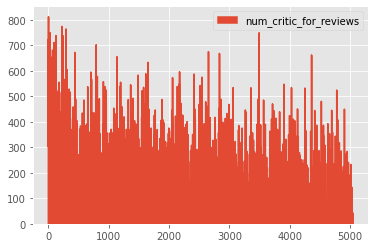

In [166]:
ax = df_movie.plot.area(y='num_critic_for_reviews')

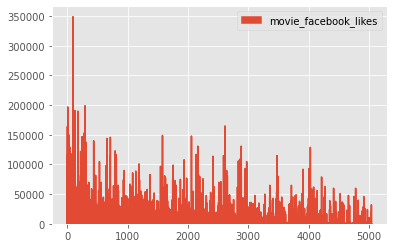

In [167]:
ax = df_movie.plot.area(y='movie_facebook_likes')

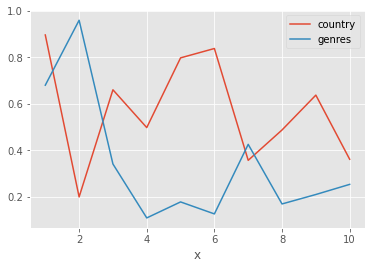

In [168]:
d = {'x' : [1,2,3,4,5,6,7,8,9,10],
     'country' : np.random.rand(10),
     'genres' : np.random.rand(10)}

df = pd.DataFrame(d)

df.plot('x',y=['country','genres'])
plt.show()

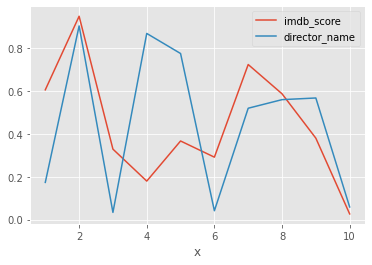

In [169]:
d = {'x' : [1,2,3,4,5,6,7,8,9,10],
     'imdb_score': np.random.rand(10),
     'director_name': np.random.rand(10)}

df = pd.DataFrame(d)

df.plot('x',y=['imdb_score','director_name'])
plt.show()

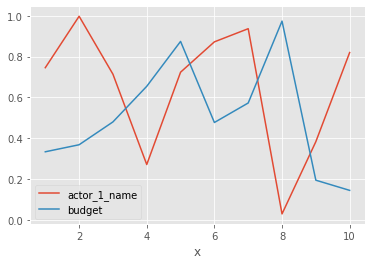

In [170]:
d = {'x' : [1,2,3,4,5,6,7,8,9,10],
     'actor_1_name': np.random.rand(10),
     'budget': np.random.rand(10)}

df = pd.DataFrame(d)

df.plot('x',y=['actor_1_name','budget'])
plt.show()

The film will continue to have a large share in every segment of social life, from education to trends to ideology. Certain genres will always take the lead in the meanstream. Films have also found their importance in encouraging cohesiveness and nation building. Films foster peace, promotes good morals and guide public opinion.

Ultimately films can be used as means of enlightening the masses. It can be a channel for good messages and empowerment to make a better society.